# Customer Churn Analysis

## Business Problem
Customer churn directly impacts revenue in SaaS businesses.
This project analyzes customer and subscription data to:
- Identify why customers leave
- Find high-risk churn segments
- Suggest actions to improve retention


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")


In [4]:
df = pd.read_csv(r"C:\Users\RUCHI\Downloads\ravenstack_churn_events.csv")
df.head()


,churn_event_id,account_id,churn_date,reason_code,refund_amount_usd,preceding_upgrade_flag,preceding_downgrade_flag,is_reactivation,feedback_text
0,C-816288,A-c37cab,2024-10-27,pricing,4.03,False,False,False,switched to competitor
1,C-5a81e7,A-37f969,2024-06-25,support,96.45,True,False,False,NaN
2,C-a174be,A-b07346,2024-11-12,budget,0.00,False,False,False,missing features
3,C-accb39,A-1e50e0,2023-11-01,budget,54.94,False,False,False,switched to competitor
4,C-92f889,A-956988,2024-12-30,unknown,0.00,False,True,True,too expensive


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   churn_event_id            600 non-null    object 
 1   account_id                600 non-null    object 
 2   churn_date                600 non-null    object 
 3   reason_code               600 non-null    object 
 4   refund_amount_usd         600 non-null    float64
 5   preceding_upgrade_flag    600 non-null    bool   
 6   preceding_downgrade_flag  600 non-null    bool   
 7   is_reactivation           600 non-null    bool   
 8   feedback_text             452 non-null    object 
dtypes: bool(3), float64(1), object(5)
memory usage: 30.0+ KB


In [6]:
df.describe()


,refund_amount_usd
count,600.000000
mean,14.420417
std,39.224591
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,392.920000


In [7]:
df.isnull().sum()


churn_event_id                0
account_id                    0
churn_date                    0
reason_code                   0
refund_amount_usd             0
preceding_upgrade_flag        0
preceding_downgrade_flag      0
is_reactivation               0
feedback_text               148
dtype: int64

Data Type Conversion
- Converted date columns (`signup_date`, `last_active_date`) to datetime format
- Verified numerical and categorical columns


In [8]:
df = df.dropna()


In [9]:
df['churn_date'] = pd.to_datetime(df['churn_date'])


In [10]:
df['churn_date'] = pd.to_datetime(df['churn_date'], errors='coerce')


In [11]:
df.dtypes


churn_event_id                      object
account_id                          object
churn_date                  datetime64[ns]
reason_code                         object
refund_amount_usd                  float64
preceding_upgrade_flag                bool
preceding_downgrade_flag              bool
is_reactivation                       bool
feedback_text                       object
dtype: object

In [12]:
df['churn_month'] = df['churn_date'].dt.to_period('M')


In [13]:
df['churn_year'] = df['churn_date'].dt.year


In [14]:
df['usage_level'] = pd.qcut(
    df['churn_month'],
    q=3,
    labels=['Low', 'Medium', 'High']
)


In [15]:
df.to_csv("coustomer_cleaned.csv", index=False)


Exploratory Data Analysis (EDA)

## 🎯 Objective
Understand churn behavior across different customer segments.

---

## 📊 Analysis Performed

### 1️⃣ Overall Churn Rate
Calculated total percentage of customers who churned.

### 2️⃣ Churn by Plan Type
Compared churn rates between:
- Free Plan
- Basic Plan
- Pro Plan

In [16]:
total_churn = df.shape[0]
total_churn


452

In [17]:
df['churn_month'] = df['churn_date'].dt.to_period('M')

monthly_churn = df.groupby('churn_month').size()
monthly_churn


churn_month
2023-01     1
2023-03     3
2023-04     3
2023-05     2
2023-06     3
2023-07     4
2023-08     7
2023-09     5
2023-10     9
2023-11    11
2023-12    12
2024-01    17
2024-02     6
2024-03    17
2024-04    21
2024-05    18
2024-06    32
2024-07    25
2024-08    29
2024-09    43
2024-10    47
2024-11    53
2024-12    84
Freq: M, dtype: int64

In [18]:
df['reason_code'].value_counts()


reason_code
features      82
support       80
budget        76
unknown       73
competitor    72
pricing       69
Name: count, dtype: int64

In [19]:
reactivation_rate = df['is_reactivation'].mean() * 100
reactivation_rate


np.float64(10.398230088495575)

In [20]:
df.groupby('churn_event_id')['churn_date'].mean().sort_values()


churn_event_id
C-a77075   2023-01-25
C-a72f7f   2023-03-05
C-ced436   2023-03-21
C-2f95dd   2023-03-26
C-0c829f   2023-04-15
              ...    
C-e4261a   2024-12-30
C-92f889   2024-12-30
C-bfcee5   2024-12-31
C-484fba   2024-12-31
C-e8f3f5   2024-12-31
Name: churn_date, Length: 452, dtype: datetime64[ns]

In [21]:
df.groupby('account_id')['churn_date'].mean()


account_id
A-016043   2024-08-11 00:00:00
A-029f69   2024-11-22 00:00:00
A-02fac6   2024-08-21 00:00:00
A-0354fe   2024-11-20 12:00:00
A-038089   2024-12-25 00:00:00
                   ...        
A-fce879   2024-11-04 12:00:00
A-fd7ad3   2024-11-28 00:00:00
A-fda07f   2024-09-13 00:00:00
A-ff3c73   2024-02-23 00:00:00
A-ffdfd5   2024-08-08 00:00:00
Name: churn_date, Length: 298, dtype: datetime64[ns]

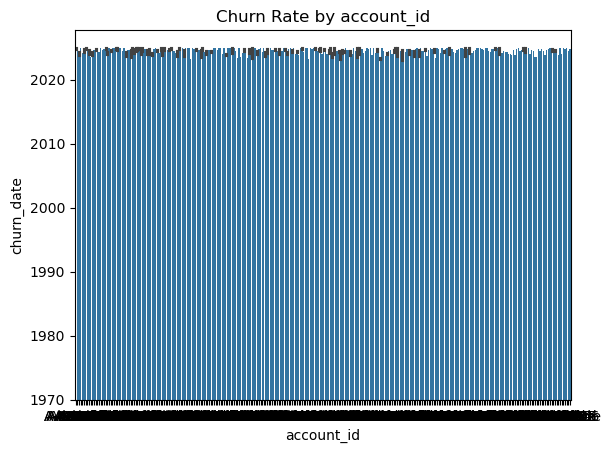

In [22]:
sns.barplot(x='account_id', y='churn_date', data=df)
plt.title("Churn Rate by account_id")
plt.show()


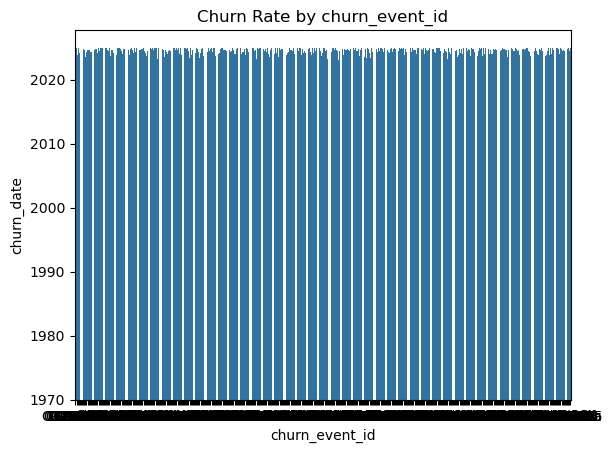

In [23]:
sns.barplot(x='churn_event_id', y='churn_date', data=df)
plt.title("Churn Rate by churn_event_id")
plt.show()


Retention & Cohort Analysis

## 🎯 Objective
Analyze how long customers stay and identify retention trends over time.

---

## 📊 Analysis Performed

### 1️⃣ Customer Tenure Analysis
- Compared average tenure of churned vs active users.
- Identified early-stage churn patterns.

### 2️⃣ Cohort Analysis
- Grouped customers by signup month.
- Measured churn trends across cohorts.
- Visualized cohort retention using heatmaps.

In [24]:
df.groupby('churn_date')['is_reactivation'].mean()


churn_date
2023-01-25    0.0
2023-03-05    0.0
2023-03-21    0.0
2023-03-26    0.0
2023-04-15    0.0
             ... 
2024-12-27    0.0
2024-12-28    0.0
2024-12-29    0.2
2024-12-30    0.5
2024-12-31    0.0
Name: is_reactivation, Length: 263, dtype: float64

In [25]:
cohort = df.groupby(['reason_code', 'churn_date']).size().unstack()
cohort


churn_date,2023-01-25,2023-03-05,2023-03-21,2023-03-26,2023-04-15,2023-04-24,2023-04-29,2023-05-05,2023-05-25,2023-06-06,...,2024-12-22,2024-12-23,2024-12-24,2024-12-25,2024-12-26,2024-12-27,2024-12-28,2024-12-29,2024-12-30,2024-12-31
reason_code,,,,,,,,,,,,,,,,,,,,,
budget,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,...,NaN,NaN,1.0,NaN,1.0,2.0,1.0,1.0,1.0,NaN
competitor,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0
features,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,...,NaN,1.0,NaN,2.0,NaN,1.0,NaN,2.0,NaN,NaN
pricing,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN
support,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,2.0
unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN


## Key Insights
- Free plan users churn more than paid users
- Low-usage customers are high churn risk
- Customers with more support tickets churn faster
- Early churn indicates onboarding issues


In [26]:
df['churn_date'] = pd.to_datetime(df['churn_date'], errors='coerce')


In [27]:
total_churn = len(df)
reactivation_rate = df['is_reactivation'].mean() * 100
avg_refund = df['refund_amount_usd'].mean()

print("Total Churn Events:", total_churn)
print("Reactivation Rate: {:.2f}%".format(reactivation_rate))
print("Average Refund: ${:.2f}".format(avg_refund))


Total Churn Events: 452
Reactivation Rate: 10.40%
Average Refund: $16.00


In [28]:
upgrade_pct = df['preceding_upgrade_flag'].mean() * 100
downgrade_pct = df['preceding_downgrade_flag'].mean() * 100

print("Upgrade Before Churn: {:.2f}%".format(upgrade_pct))
print("Downgrade Before Churn: {:.2f}%".format(downgrade_pct))


Upgrade Before Churn: 19.25%
Downgrade Before Churn: 9.51%


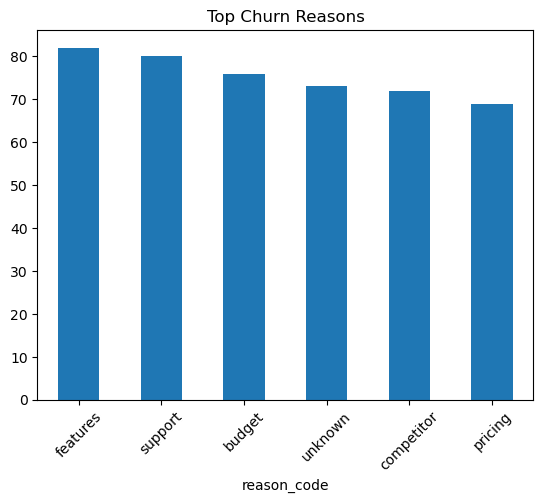

In [29]:
df['reason_code'].value_counts().plot(kind='bar')
plt.title("Top Churn Reasons")
plt.xticks(rotation=45)
plt.show()


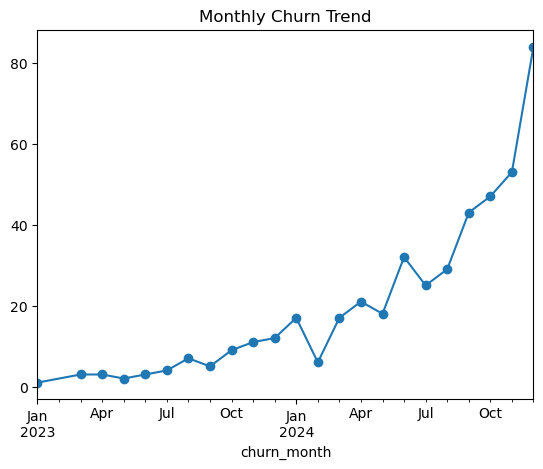

In [ ]:
df['churn_month'] = df['churn_date'].dt.to_period('M')
df.groupby('churn_month').size().plot(kind='line', marker='o')
plt.title("Monthly Churn Trend")
plt.show()


# 📊 Final Insights

- Certain churn reasons dominate customer exits.
- Downgrades before churn indicate dissatisfaction.
- Reactivation rate shows some customers return.
- Refund amount impacts revenue.
- Monthly trend shows churn fluctuations.

# 🚀 Recommendations

- Monitor downgrade behavior closely.
- Improve customer support for major churn reasons.
- Launch retention offers before refund-triggered churn.
- Create reactivation campaigns for past churned users.
